<a href="https://colab.research.google.com/github/Monaliisa/Classifica-o-aprendendo-a-classificar-dados-com-Machine-Learning/blob/main/Classifica%C3%A7%C3%A3o_aprendendo_a_classificar_dados_com_Machine_Learning_(Monalisa)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/marketing_investimento.csv')

In [3]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


A `aderencia_investimento` é nossa variavel alvo, pois ela contém a resposta que queremos ter.

Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(dados, x='aderencia_investimento', text_auto = True)

In [7]:
px.histogram(dados, x='estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [8]:
px.histogram(dados, x='escolaridade', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [9]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [10]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [11]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

# Não há nenhuma inconsistência pois o minimo é uma idade válida (maior que 18 anos) e a idade máxima faz sentido, não é um outlier

In [12]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

#Embora esses vários ouliters, ele é importante para a nossa analise exploratoria,
#pois estamos falando do saldo da pessoa não está fora da realidade'''

In [13]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [14]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

# Aula 02


## Separação de Variáveis

Precisamos especificar para o algoritmo qual vai ser a nossa váriavel alvo, que no nosso caso seria **`aderencia_investimentos`**. As variaveis que não são alvo, são chamadas de **variaveis explicativas**


Ao removermos a coluna alvo, estamos separando as informações que o algoritmo usará para fazer a previsão (variáveis explicativas) da informação que queremos que ele preveja (variável alvo).

In [15]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [16]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [17]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

## Transformando Variáveis Explicativas


Precisamos transformar **variáveis categóricas** em **numéricas** para que nosso modelo de Machine Learning possa compreendêlas.

A forma ideal de fazer esse tipo de transformação, que mantém a informação original, é conhecida como **one hot encoding**. Essa ação transforma cada uma das classes das variáveis categóricas em novas colunas, utilizando o valor 0 para representar a ausência da característica e 1 para a presença da característica na amostra da base de dados. Perceba em detalhes, o dinamismo desse processo na imagem a seguir.




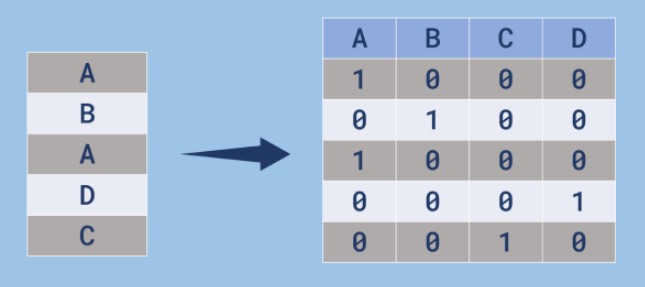


In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
colunas = x.columns

In [21]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [22]:
x = one_hot.fit_transform(x)

In [23]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [24]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando váriavel Alvo

O Scikit-Learn possui uma função chamada **Label Encoder**, exclusiva para fazer a transformação da **variável alvo**.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
y = label_encoder.fit_transform(y)


In [28]:
y

array([1, 1, 0, ..., 1, 1, 1])